In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
viga = {
    'fuerza_B': 'kN',
    'fuerza_C': 'kN',
    'w': 'kN / m',
    'L1': 'm',
    'L2': 'm',
    'L3': 'm',
}

In [3]:
for key, unit in viga.items():
    while True:
        try:
            viga[key] = float(input(f"Ingrese el valor de {key} en {unit}: "))
            break
        except:
            print(f"Ingrese el valor en {unit} correctamente!")
        
        
# kN
fuerza_B = -3
fuerza_C = 8
 # kN / m
w = 4.8

L1 = 0.25
L2 = 0.5
L3 = 2

Ingrese el valor de fuerza_B en kN: fff
Ingrese el valor en kN correctamente!
Ingrese el valor de fuerza_B en kN: asdfaews
Ingrese el valor en kN correctamente!
Ingrese el valor de fuerza_B en kN: -3
Ingrese el valor de fuerza_C en kN: gasfdfas
Ingrese el valor en kN correctamente!
Ingrese el valor de fuerza_C en kN: 32fdsxz
Ingrese el valor en kN correctamente!
Ingrese el valor de fuerza_C en kN: 8
Ingrese el valor de w en kN / m: 4.8
Ingrese el valor de L1 en m: 0.25
Ingrese el valor de L2 en m: 0.5
Ingrese el valor de L3 en m: 2


In [4]:
viga

{'fuerza_B': -3.0, 'fuerza_C': 8.0, 'w': 4.8, 'L1': 0.25, 'L2': 0.5, 'L3': 2.0}

In [7]:
Ax, Ay, Ma, x = sp.symbols("Ax Ay Ma x")

In [8]:
equilibrio_y = viga["fuerza_B"] + viga["fuerza_C"] - viga["w"] * (viga["L1"] + viga["L3"]) / 2 - viga["w"] * viga["L2"] + Ay
ecuacion_y = sp.Eq(equilibrio_y, 0)
ecuacion_y

Eq(Ay - 2.8, 0)

In [9]:
reaccion_ay = sp.solve(ecuacion_y)[0]
reaccion_ay

2.80000000000000

In [10]:
equilibrio_x = Ax + 0
ecuacion_x = sp.Eq(equilibrio_x, 0)
reaccion_ax = sp.solve(ecuacion_x)[0]
reaccion_ax

0

In [11]:
equilibrio_momentos = Ma + viga["fuerza_C"] * (viga["L1"] + viga["L2"]) + viga["fuerza_B"] * viga["L1"] - viga["w"] / 2 * viga["L1"] * (2 * viga["L1"] / 3) - viga["w"] * viga["L2"] * (viga["L1"] + viga["L2"] / 2) - viga["w"] / 2 * viga["L3"] * (viga["L1"] + viga["L2"] + viga["L3"] / 3)
ecuacion_momento = sp.Eq(equilibrio_momentos, 0)
reaccion_ma = sp.solve(ecuacion_momento)[0]
reaccion_ma

2.85000000000000

In [12]:
# CORTANTE Y MOMENTO PRIMER TRAMO

w_tramo1 = viga["w"] * x / viga["L1"]
V_x_tramo1 = reaccion_ay - sp.integrate(w_tramo1, x)

M_x_tramo1 = sp.integrate(V_x_tramo1, x) - reaccion_ma

V_x_tramo1

2.8 - 9.6*x**2

In [13]:
M_x_tramo1

-3.2*x**3 + 2.8*x - 2.85

In [14]:
# CORTANTE Y MOMENTO SEGUNDO TRAMO
w_tramo2 = viga["w"] 
V_x_tramo2 = V_x_tramo1.subs(x, viga["L1"]) - sp.integrate(w_tramo2, x) + viga["fuerza_B"]

M_x_tramo2 = sp.integrate(V_x_tramo2, x) + M_x_tramo1.subs(x, viga["L1"])

V_x_tramo2

-4.8*x - 0.8

In [15]:
M_x_tramo2

-2.4*x**2 - 0.8*x - 2.2

In [16]:
# CORTANTE Y MOMENTO TERCER TRAMO
w_tramo3 =  - viga["w"] * x / viga["L3"] + viga["w"]
V_x_tramo3 = V_x_tramo2.subs(x, viga["L2"]) - sp.integrate(w_tramo3, x) + viga["fuerza_C"]

M_x_tramo3 = sp.integrate(V_x_tramo3, x) + M_x_tramo2.subs(x, viga["L2"])

V_x_tramo3

1.2*x**2 - 4.8*x + 4.8

In [17]:
M_x_tramo3

0.4*x**3 - 2.4*x**2 + 4.8*x - 3.2

# Plotear diagramas

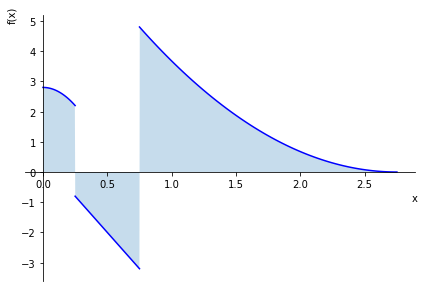

In [78]:
# DFC
x_fill = np.linspace(0, L1 + L2 + L3, 999)
f1 = sp.Lambda(x, V_x_tramo1)
f2 = sp.Lambda(x, V_x_tramo2)
f3 = sp.Lambda(x, V_x_tramo3)

tramo1 = np.array([f1(i) for i in x_fill[x_fill <= L1]], dtype='float')
tramo2 = np.array([f2(i - L1) for i in x_fill[(x_fill >= L1) & (x_fill <= L1 + L2)]], dtype='float')
tramo3 = np.array([f3(i - L1 - L2) for i in x_fill[x_fill >= L1 + L2]], dtype='float')

cortante_fill = np.concatenate((tramo1, tramo2, tramo3))
sp.plot((V_x_tramo1, (x, 0, L1)), (V_x_tramo2.subs(x, x - L1), (x, L1, L1 + L2)), (V_x_tramo3.subs(x, x - (L1 + L2)), (x, L1 + L2, L1 + L2 + L3)), line_color='blue', fill={'alpha': 0.25, 'x': x_fill, 'y1': cortante_fill})

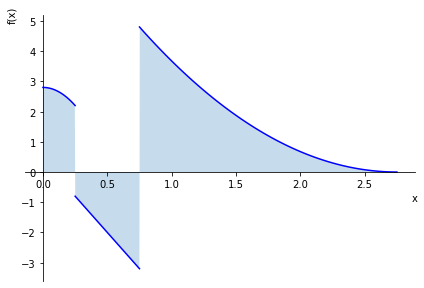

In [81]:
x_array = np.linspace(0, L1 + L2 + L3, 999)
tramo1 = sp.lambdify(x, V_x_tramo1)(x_array[x_array <= L1])
tramo2 = sp.lambdify(x, V_x_tramo2)(x_array[(x_array >= L1) & (x_array <= L1 + L2)] - L1)
tramo3 = sp.lambdify(x, V_x_tramo3)(x_array[x_array >= L1 + L2] - L1 - L2)

cortante_fill = np.concatenate((tramo1, tramo2, tramo3))
sp.plot((V_x_tramo1, (x, 0, L1)), (V_x_tramo2.subs(x, x - L1), (x, L1, L1 + L2)), (V_x_tramo3.subs(x, x - (L1 + L2)), (x, L1 + L2, L1 + L2 + L3)), line_color='blue', fill={'alpha': 0.25, 'x': x_fill, 'y1': cortante_fill})

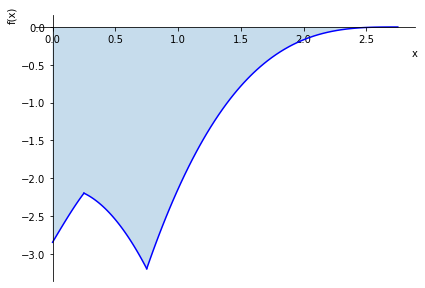

In [90]:
# DMF
momento_tramo1 = sp.lambdify(x, M_x_tramo1)(x_array[x_array <= L1])
momento_tramo2 = sp.lambdify(x, M_x_tramo2)(x_array[(x_array >= L1) & (x_array <= L1 + L2)] - L1)
momento_tramo3 = sp.lambdify(x, M_x_tramo3)(x_array[x_array >= L1 + L2] - L1 - L2)

momento_fill = np.concatenate((momento_tramo1, momento_tramo2, momento_tramo3))
sp.plot((M_x_tramo1, (x, 0, L1)), (M_x_tramo2.subs(x, x - L1), (x, L1, L1 + L2)), (M_x_tramo3.subs(x, x - (L1 + L2)), (x, L1 + L2, L1 + L2 + L3)), line_color='blue', fill={'alpha': 0.25, 'x': x_array, 'y1': momento_fill})

In [92]:
# MOMENTO MAXIMO
np.amin(momento_fill)

-3.198397395994394